In [40]:
#importing some initail libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel("counties_final.xlsb")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 43 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   fips_code                              3142 non-null   int64  
 1   county                                 3142 non-null   object 
 2   state                                  3142 non-null   object 
 3   state_code                             3142 non-null   object 
 4   high_school_graduation_pct             3142 non-null   float64
 5   college_graduation_pct                 3142 non-null   float64
 6   bachelors_degree_pct                   3142 non-null   float64
 7   total_population                       3142 non-null   int64  
 8   poverty_pct                            3142 non-null   float64
 9   avg_household_income                   3142 non-null   float64
 10  unemployment_rate                      3142 non-null   float64
 11  popu

In [4]:
df.head()

,fips_code,county,state,state_code,high_school_graduation_pct,college_graduation_pct,bachelors_degree_pct,total_population,poverty_pct,avg_household_income,...,normalized_ameri_es,normalized_asian,normalized_hawn_pi,normalized_hispanic,normalized_other_e,normalized_lead_percentage,normalized_life_expectancy,normalized_per_capita_income,median_age,democrat_percentage
0,4009,Graham County,Arizona,AZ,29.622390,39.149963,14.676038,47492,20.4,52644.0,...,0.068634,0.000148,0.000572,0.002415,0.001417,0.484270,0.473731,0.063825,31.7,27.288101
1,4011,Greenlee County,Arizona,AZ,32.575495,39.101007,16.001388,12157,9.5,71669.0,...,0.002489,0.000034,0.000055,0.000862,0.000592,0.368876,0.522562,0.094953,34.8,32.697095
2,17011,Bureau County,Illinois,IL,35.512442,34.656263,20.425981,37222,12.1,61431.0,...,0.001251,0.000169,0.000066,0.000575,0.000489,0.233438,0.525105,0.105638,42.4,39.045667
3,4012,La Paz County,Arizona,AZ,33.955394,38.218783,11.819147,24534,20.3,44330.0,...,0.033551,0.000079,0.000077,0.001025,0.001192,0.418739,0.632562,0.101163,53.9,30.359810
4,17013,Calhoun County,Illinois,IL,40.612797,34.815260,17.332532,5110,10.1,63586.0,...,0.000115,0.000009,0.000000,0.000009,0.000005,0.536021,0.535268,0.118938,44.6,24.862284


In [5]:
#These are my faetures (columns) on which i have to find the cluster of counties
columns_for_clustering = ['median_age', 'democrat_percentage', 'per_capita_income', 'bachelors_degree_pct', 'life_expectancy', 'population_density']

In [6]:
X=df[columns_for_clustering]

In [7]:
X.head()

,median_age,democrat_percentage,per_capita_income,bachelors_degree_pct,life_expectancy,population_density
0,31.7,27.288101,38785,14.676038,77.396029,3.163771
1,34.8,32.697095,48079,16.001388,78.725347,1.992160
2,42.4,39.045667,51269,20.425981,78.794550,14.829959
3,53.9,30.359810,49933,11.819147,81.719814,1.776302
4,44.6,24.862284,55240,17.332532,79.071213,7.389684


In [41]:
#importing libraries to scale and standardization data that i can do PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [9]:
scaler=StandardScaler()

In [10]:
scaler.fit(X)

StandardScaler()

In [11]:
Scaled_data=scaler.transform(X)

In [12]:
Scaled_data

array([[-1.71638286, -0.40730455, -0.99956411, -0.84318589,  0.00370102,
        -0.14556302],
       [-1.09828869, -0.07799652, -0.36090127, -0.70947572,  0.52040724,
        -0.14724581],
       [ 0.41703894,  0.30851449, -0.14169162, -0.26309355,  0.54730661,
        -0.12880684],
       ...,
       [ 0.27746929, -0.48454972, -0.24380621, -0.6566445 ,  1.32541212,
        -0.13852945],
       [ 0.0980226 ,  0.46237998, -0.24868517, -0.26580628,  0.73571668,
        -0.12783562],
       [ 0.21765373,  0.82764553, -0.28964095,  0.04830055,  1.05884188,
        -0.12872797]])

In [25]:
pca=PCA(n_components=3)

In [14]:
pca.fit(Scaled_data)

PCA(n_components=3)

In [15]:
X_pca=pca.transform(Scaled_data)

In [16]:
X_pca.shape

(3142, 3)

In [42]:
#importing the K-Means Clustering library for training model
from sklearn.cluster import KMeans

C:\Users\mbila\miniconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mbila\miniconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mbila\miniconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mbila\miniconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

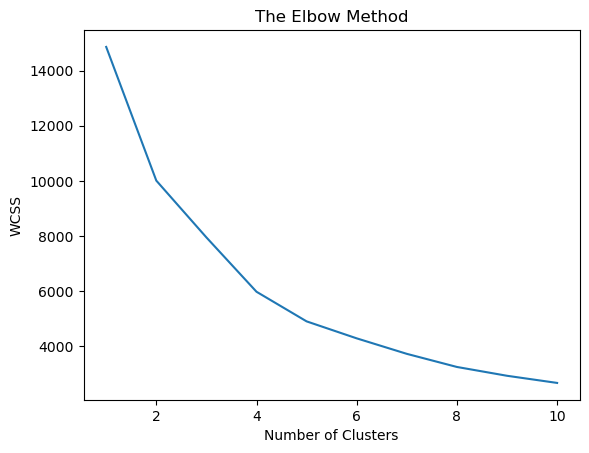

In [18]:
#WCSS measn Within-Cluster Sum of Squares. 
#WCSS measures the compactness of the clusters, indicating how close data points within a cluster are to each other.
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0 #init='K-means++' means that how far the centroids are from each other
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_) #it wil find the within cluster sum of squared of distance

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\mbila\miniconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mbila\miniconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mbila\miniconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\mbila\miniconda3\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

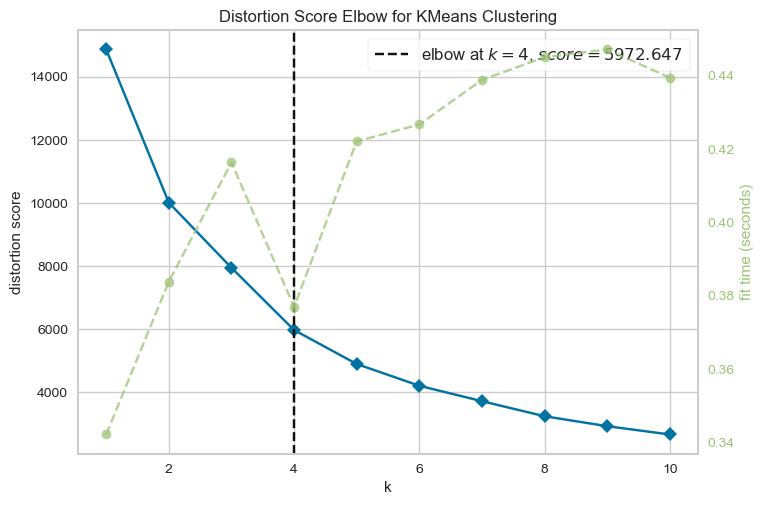

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
#This library gives us the number of cluters we should have 
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the KElbowVisualizer with the KMeans model
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 11))

# Fit the visualizer and display the elbow plot
visualizer.fit(X_pca)
visualizer.show()


In [52]:
#Here is the part that we are training the model 
clusterer = KMeans(n_clusters=4 ,init='k-means++',n_init="auto",random_state=77)
clusterer.fit(X_pca)
cluster_labels=clusterer.predict(X_pca)
cluster_labels

array([1, 1, 0, ..., 0, 0, 3])

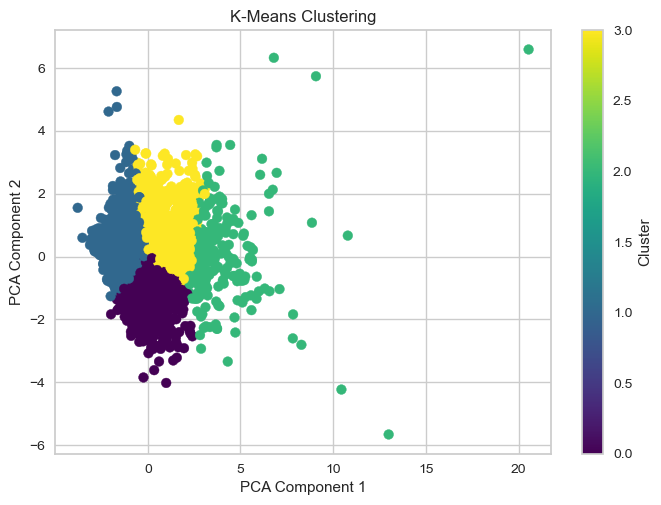

In [53]:
x = X_pca[:, 0]  # X-coordinate based on the first PCA component
y = X_pca[:, 1]  # Y-coordinate based on the second PCA component

# Create a scatter plot with different colors for each cluster
plt.scatter(x, y, c=cluster_labels, cmap='viridis')  # You can choose a different colormap
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()